전체 데이터셋의 개수: 2493


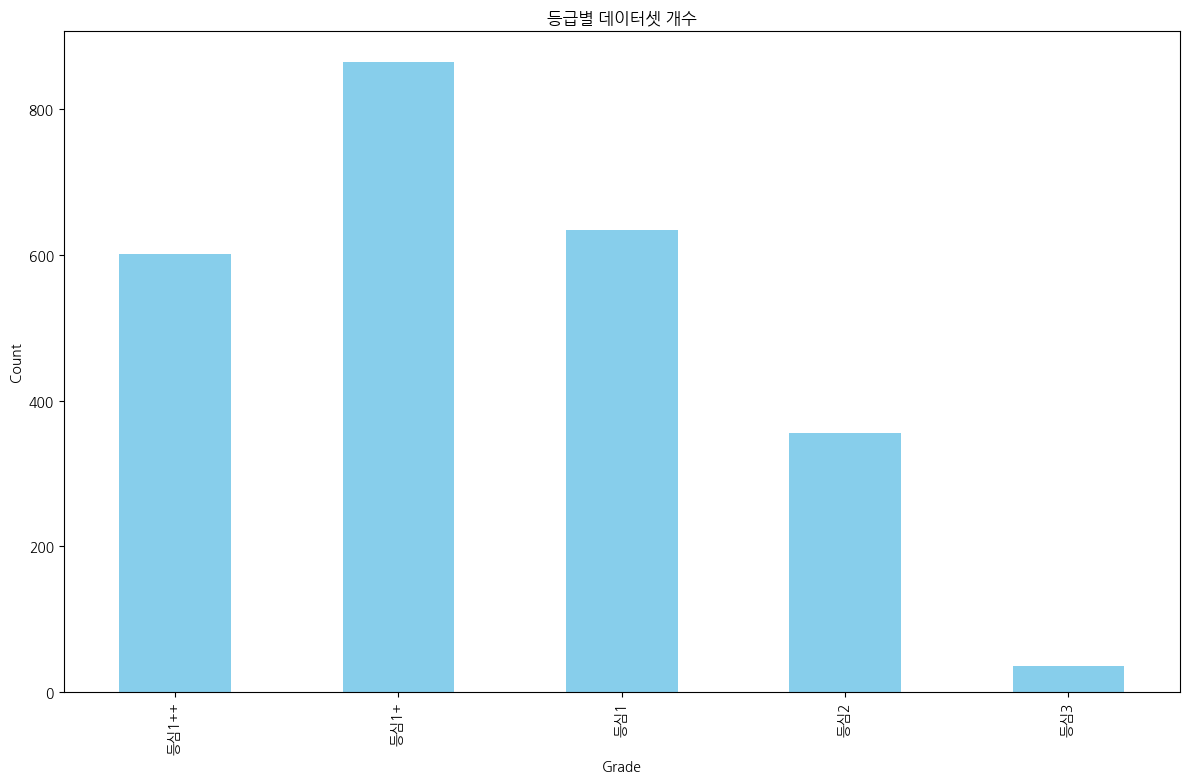

/tmp/ipykernel_1830/361242857.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


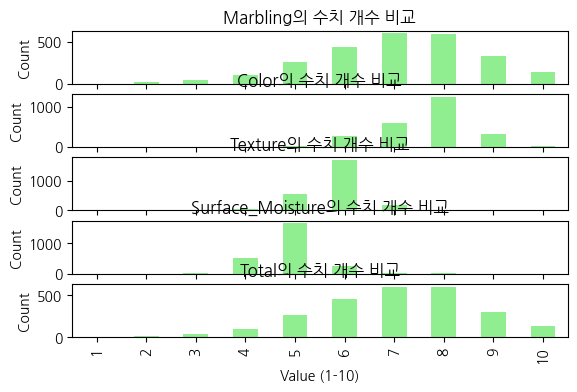

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 폰트 설정 (NanumGothic)
rc('font', family='NanumGothic')

# CSV 파일 읽기
df = pd.read_csv('../dataset/only_new_1211.csv')

# 등급 컬럼을 원하는 순서로 정렬하도록 설정
grade_order = ['등심1++', '등심1+', '등심1', '등심2', '등심3']
df['grade'] = pd.Categorical(df['grade'], categories=grade_order, ordered=True)
grade_counts = df['grade'].value_counts().reindex(grade_order)

# 전체 데이터셋의 개수 출력
total_count = len(df)
print(f'전체 데이터셋의 개수: {total_count}')

# 등급별 데이터셋 개수 시각화
plt.figure(figsize=(12, 45))  # 비율 조정 (너비 8, 높이 6)

plt.subplot(6, 1, 1)
grade_counts.plot(kind='bar', color='skyblue')  # 색깔 변경: lightcoral, skyblues
plt.title('등급별 데이터셋 개수')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.tight_layout()  # 레이아웃 간격 조정
plt.show()

# Marbling, Color, Texture, Surface_Moisture, Total에서 1~10의 수치 개수 비교
features = ['Marbling', 'Color', 'Texture', 'Surface_Moisture', 'Total']

for i, feature in enumerate(features, 2):
    # 1~10까지 모든 값을 포함하여 카운트하도록 index를 설정
    value_counts = df[feature].value_counts().reindex(range(1, 11), fill_value=0).sort_index()

    # 각 수치 개수 시각화
    plt.subplot(6, 1, i)
    value_counts.plot(kind='bar', color='lightgreen')
    plt.title(f'{feature}의 수치 개수 비교')
    plt.xlabel('Value (1-10)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



Marbling 수치 비율 (only_new_default):
1     0.000000
2     0.005579
3     0.016309
4     0.039485
5     0.100858
6     0.178541
7     0.242060
8     0.233047
9     0.128755
10    0.055365
Name: Marbling, dtype: float64

Marbling 수치 비율 (default):
1     0.001794
2     0.027234
3     0.044847
4     0.136823
5     0.148402
6     0.097195
7     0.256360
8     0.104534
9     0.083496
10    0.099315
Name: Marbling, dtype: float64

Color 수치 비율 (only_new_default):
1     0.000000
2     0.000000
3     0.000000
4     0.001288
5     0.012876
6     0.118884
7     0.240343
8     0.491845
9     0.125751
10    0.009013
Name: Color, dtype: float64

Color 수치 비율 (default):
1     0.000000
2     0.000000
3     0.001142
4     0.086432
5     0.137639
6     0.064742
7     0.287671
8     0.106327
9     0.171070
10    0.144977
Name: Color, dtype: float64

Texture 수치 비율 (only_new_default):
1     0.000000
2     0.000000
3     0.001717
4     0.016309
5     0.237339
6     0.665665
7     0.075536
8     0.003433
9     0

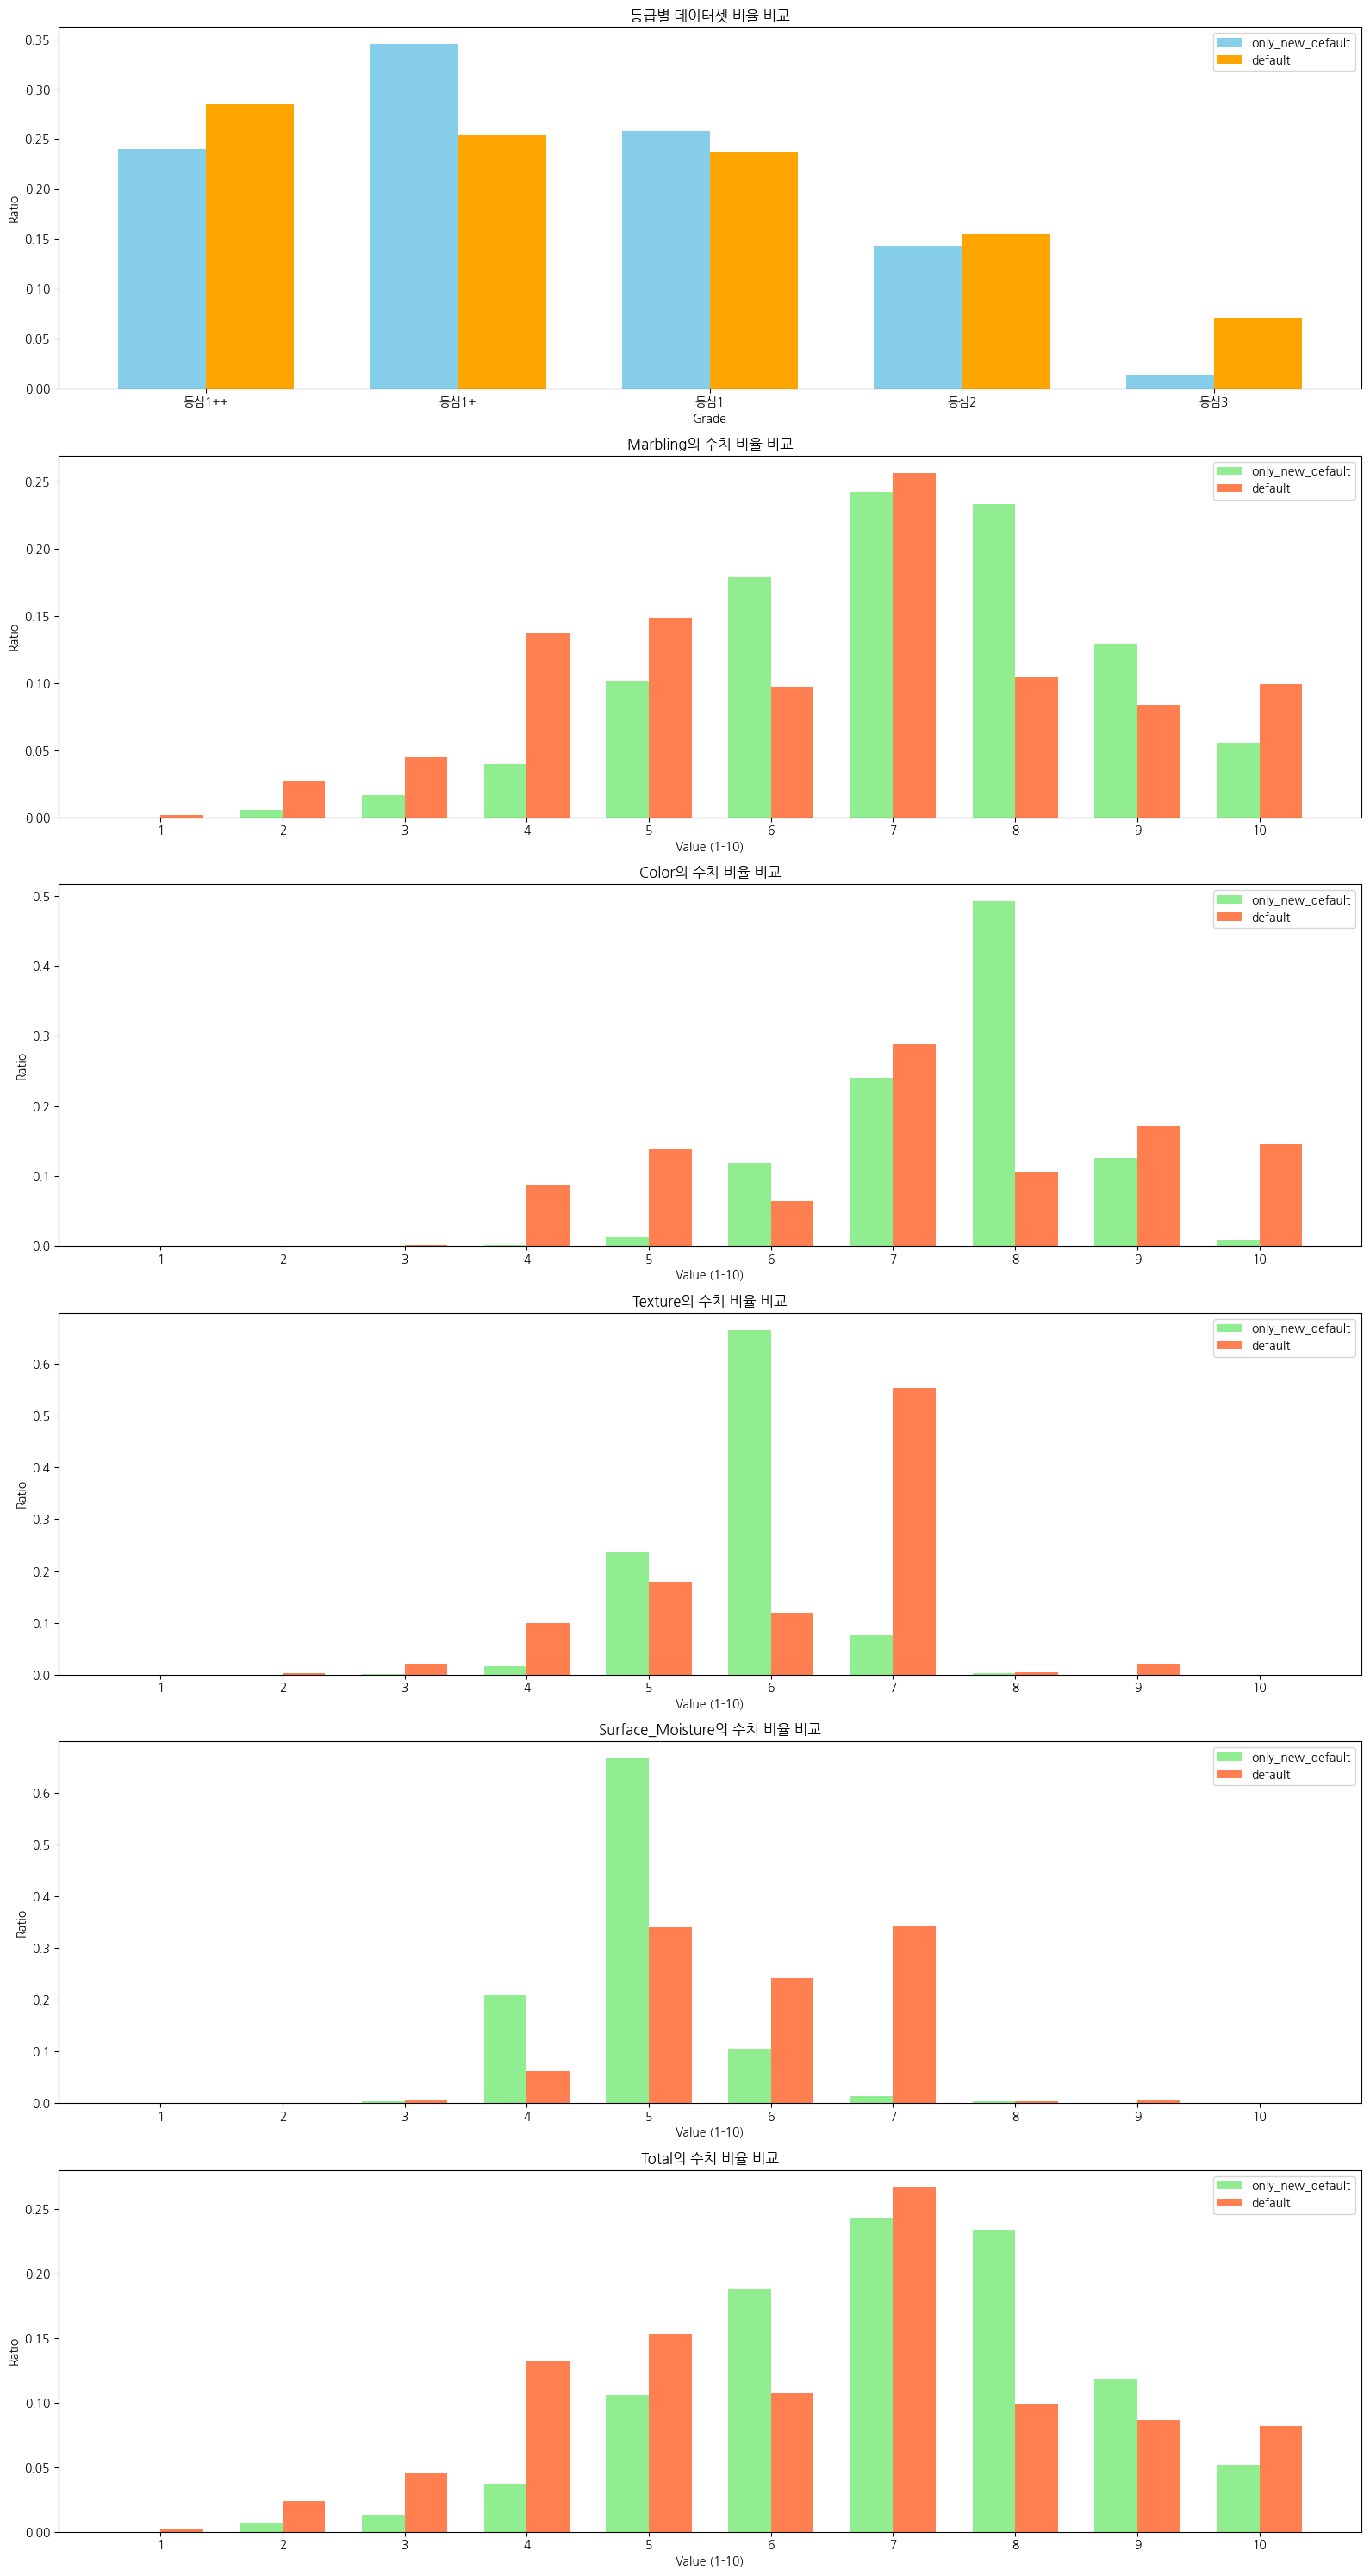

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# 폰트 설정 (NanumGothic)
rc('font', family='NanumGothic')

# CSV 파일 읽기
df1 = pd.read_csv('../dataset/only_new_1204.csv')
df2 = pd.read_csv('../dataset/default_1213.csv')

# 전체 데이터셋의 개수 구하기
total_count1 = len(df1)
total_count2 = len(df2)

# 등급별 데이터셋 개수 구하기 (비율로 환산)
grade_order = ['등심1++', '등심1+', '등심1', '등심2', '등심3']
df1['grade'] = pd.Categorical(df1['grade'], categories=grade_order, ordered=True)
df2['grade'] = pd.Categorical(df2['grade'], categories=grade_order, ordered=True)
grade_counts1 = df1['grade'].value_counts(normalize=True)
grade_counts2 = df2['grade'].value_counts(normalize=True)

# 등급별 데이터셋 개수 시각화
plt.figure(figsize=(16, 30))

plt.subplot(6, 1, 1)
bar_width = 0.35
index = np.arange(len(grade_counts1.index.union(grade_counts2.index)))

# 인덱스 조정 (두 데이터프레임의 등급을 모두 포함하도록 설정)
grade_counts1 = grade_counts1.reindex(grade_counts1.index.union(grade_counts2.index), fill_value=0)
grade_counts2 = grade_counts2.reindex(grade_counts1.index, fill_value=0)

plt.bar(index, grade_counts1, bar_width, label='only_new_default', color='skyblue')
plt.bar(index + bar_width, grade_counts2, bar_width, label='default', color='orange')
plt.title('등급별 데이터셋 비율 비교')
plt.xlabel('Grade')
plt.ylabel('Ratio')
plt.xticks(index + bar_width / 2, grade_counts1.index)
plt.legend()

# Marbling, Color, Texture, Surface_Moisture, Total에서 1~10의 수치 개수 비교 (비율로 환산)
features = ['Marbling', 'Color', 'Texture', 'Surface_Moisture', 'Total']

for i, feature in enumerate(features, 2):
    # 각 CSV 파일에서 1~10까지 모든 값을 포함하여 카운트하고 비율로 변환
    value_counts1 = df1[feature].value_counts(normalize=True).reindex(range(1, 11), fill_value=0).sort_index()
    value_counts2 = df2[feature].value_counts(normalize=True).reindex(range(1, 11), fill_value=0).sort_index()
    
    print(f'\n{feature} 수치 비율 (only_new_default):')
    print(value_counts1)
    print(f'\n{feature} 수치 비율 (default):')
    print(value_counts2)

    # 각 수치 비율 시각화
    plt.subplot(6, 1, i)
    plt.bar(np.arange(1, 11), value_counts1, bar_width, label='only_new_default', color='lightgreen')
    plt.bar(np.arange(1, 11) + bar_width, value_counts2, bar_width, label='default', color='coral')
    plt.title(f'{feature}의 수치 비율 비교')
    plt.xlabel('Value (1-10)')
    plt.ylabel('Ratio')
    plt.xticks(np.arange(1, 11) + bar_width / 2, range(1, 11))
    plt.legend()

plt.tight_layout()
plt.show()
